- ### 최근 1일(a) 기준 비중이 최근 10일(b) 비중의 3배(c) 이상이면 급등 종목으로 지정

In [1]:
import pandas as pd
import pyupbit

pyupbit.get_ohlcv("KRW-BTC").head()

,open,high,low,close,volume,value
2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,12047.681553,8.198303e+11
2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11
2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11
2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11
2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11


In [2]:
tickers = pyupbit.get_tickers('KRW')
print(len(tickers), tickers[:5])

108 ['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC']


In [3]:
df = pd.DataFrame()

for ticker in tickers:
    
    try:
        temp = pyupbit.get_ohlcv(ticker)
        temp['ticker'] = ticker
        df = pd.concat([df, temp])
    except:
        pass
    
len(df)

20576

In [4]:
df.head()

,open,high,low,close,volume,value,ticker
2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,12047.681553,8.198303e+11,KRW-BTC
2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC
2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC
2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC
2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC


In [6]:
df2 = pd.DataFrame()

for i in range(len(set(df.index))):
    temp = df[df.index == df.index[i]]
    temp_sum = df[df.index == df.index[i]].volume.sum()
    temp['ratio'] = temp['volume'] / temp_sum
    temp.head()
    df2 = pd.concat([df2, temp])
    
    if i % 10 == 0:
        print(i)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [11]:
df2.head()

,open,high,low,close,volume,value,ticker,ratio
2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,1.204768e+04,8.198303e+11,KRW-BTC,5.028972e-09
2021-05-07 09:00:00,4255000.0,4293000.0,4061000.0,4169000.0,1.153392e+05,4.794876e+11,KRW-ETH,4.814517e-08
2021-05-07 09:00:00,150050.0,176200.0,130050.0,141000.0,6.678386e+06,1.025882e+12,KRW-NEO,2.787708e-06
2021-05-07 09:00:00,4705.0,5330.0,4330.0,4800.0,2.410809e+07,1.174804e+11,KRW-MTL,1.006326e-05
2021-05-07 09:00:00,435150.0,476000.0,398400.0,419500.0,8.017440e+05,3.450098e+11,KRW-LTC,3.346659e-07


In [13]:
len(set(df2.index))

200

- 코인별로 numbering 해서 이게 몇 번째 데이터인지 파악한다
- 코인별 최근 10개의 데이터를 subsampling 해서 비율들의 평균을 낸다
- 비율들의 평균보다 마지막 데이터의 비율이 3배 이상 높으면 급등종목으로 체크한다

In [15]:
temp = df2[df2.ticker == 'KRW-BTC']
temp.head()

,open,high,low,close,volume,value,ticker,ratio
2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,12047.681553,8.198303e+11,KRW-BTC,5.028972e-09
2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC,1.005481e-08
2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC,1.432649e-08
2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC,5.569010e-09
2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC,1.028464e-08


In [16]:
temp.reset_index(level=0, inplace=True)

In [20]:
temp2 = (
    temp.assign(
        rn=temp.sort_values(["index"], ascending=False)
        .groupby(["ticker"])
        .cumcount()
        + 1
    )
    #.query("rn < 3")
    .sort_values(["ticker", "rn"])
)
temp2

,index,open,high,low,close,volume,value,ticker,ratio,rn
199,2021-11-22 09:00:00,73096000.0,73197000.0,71047000.0,71535000.0,3976.938842,2.855432e+11,KRW-BTC,3.408197e-08,1
198,2021-11-21 09:00:00,73669000.0,74200000.0,72695000.0,73047000.0,4787.876662,3.506905e+11,KRW-BTC,2.651246e-08,2
197,2021-11-20 09:00:00,71813000.0,74090000.0,71500000.0,73669000.0,5649.734126,4.105417e+11,KRW-BTC,2.656569e-08,3
196,2021-11-19 09:00:00,70602000.0,72376000.0,69150000.0,71813000.0,9106.098541,6.446603e+11,KRW-BTC,3.260586e-08,4
195,2021-11-18 09:00:00,73941000.0,74494000.0,70000000.0,70611000.0,15304.608810,1.116607e+12,KRW-BTC,2.635635e-08,5
...,...,...,...,...,...,...,...,...,...,...
4,2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC,1.028464e-08,196
3,2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC,5.569010e-09,197
2,2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC,1.432649e-08,198
1,2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC,1.005481e-08,199


In [17]:
temp

,index,open,high,low,close,volume,value,ticker,ratio
0,2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,12047.681553,8.198303e+11,KRW-BTC,5.028972e-09
1,2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC,1.005481e-08
2,2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC,1.432649e-08
3,2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC,5.569010e-09
4,2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC,1.028464e-08
...,...,...,...,...,...,...,...,...,...
195,2021-11-18 09:00:00,73941000.0,74494000.0,70000000.0,70611000.0,15304.608810,1.116607e+12,KRW-BTC,2.635635e-08
196,2021-11-19 09:00:00,70602000.0,72376000.0,69150000.0,71813000.0,9106.098541,6.446603e+11,KRW-BTC,3.260586e-08
197,2021-11-20 09:00:00,71813000.0,74090000.0,71500000.0,73669000.0,5649.734126,4.105417e+11,KRW-BTC,2.656569e-08
198,2021-11-21 09:00:00,73669000.0,74200000.0,72695000.0,73047000.0,4787.876662,3.506905e+11,KRW-BTC,2.651246e-08


In [27]:
temp3 = temp2[(temp2.rn >= 2) & (temp2.rn <= 11)]
temp3

,index,open,high,low,close,volume,value,ticker,ratio,rn
198,2021-11-21 09:00:00,73669000.0,74200000.0,72695000.0,73047000.0,4787.876662,3.506905e+11,KRW-BTC,2.651246e-08,2
197,2021-11-20 09:00:00,71813000.0,74090000.0,71500000.0,73669000.0,5649.734126,4.105417e+11,KRW-BTC,2.656569e-08,3
196,2021-11-19 09:00:00,70602000.0,72376000.0,69150000.0,71813000.0,9106.098541,6.446603e+11,KRW-BTC,3.260586e-08,4
195,2021-11-18 09:00:00,73941000.0,74494000.0,70000000.0,70611000.0,15304.608810,1.116607e+12,KRW-BTC,2.635635e-08,5
194,2021-11-17 09:00:00,73897000.0,74712000.0,72000000.0,73935000.0,9918.319954,7.275344e+11,KRW-BTC,1.667966e-08,6
193,2021-11-16 09:00:00,77600000.0,77602000.0,73325000.0,73897000.0,12978.656081,9.728458e+11,KRW-BTC,1.797058e-08,7
192,2021-11-15 09:00:00,79323000.0,80250000.0,77330000.0,77602000.0,6972.545226,5.506619e+11,KRW-BTC,1.573878e-08,8
191,2021-11-14 09:00:00,77867000.0,79350000.0,77579000.0,79310000.0,3826.416588,3.001073e+11,KRW-BTC,8.353274e-09,9
190,2021-11-13 09:00:00,78165000.0,78770000.0,77120000.0,77867000.0,4350.104533,3.385629e+11,KRW-BTC,9.975886e-09,10
189,2021-11-12 09:00:00,78938000.0,79100000.0,76712000.0,78165000.0,7117.165348,5.555562e+11,KRW-BTC,5.186098e-09,11


In [32]:
temp3.ratio.values

array([2.65124572e-08, 2.65656870e-08, 3.26058607e-08, 2.63563485e-08,
       1.66796555e-08, 1.79705826e-08, 1.57387755e-08, 8.35327363e-09,
       9.97588585e-09, 5.18609833e-09])

In [34]:
import numpy as np

In [35]:
np.mean(temp3.ratio.values)

1.859446248544533e-08

In [42]:
temp2[temp2.rn == 1].ratio.values

array([3.40819675e-08])

In [45]:
temp2[temp2.rn == 1].ratio.values > np.mean(temp3.ratio.values) * 3

array([False])

In [46]:
temp2[temp2.rn == 1].ratio.values > np.mean(temp3.ratio.values) * 0.1

array([ True])

In [76]:
temp3.columns = ['idx', 'open', 'high', 'low', 'close', 'volume', 'value', 'ticker', 'ratio', 'rn']
temp3

,idx,open,high,low,close,volume,value,ticker,ratio,rn
4,2021-11-22 09:00:00,2275.0,2285.0,2170.0,2220.0,1.142754e+07,2.524210e+10,KRW-ALGO,0.000098,1
3,2021-11-21 09:00:00,2270.0,2330.0,2210.0,2280.0,2.284472e+07,5.182400e+10,KRW-ALGO,0.000127,2
2,2021-11-20 09:00:00,2325.0,2355.0,2195.0,2270.0,3.469161e+07,7.884941e+10,KRW-ALGO,0.000163,3
1,2021-11-19 09:00:00,2300.0,2410.0,2155.0,2325.0,7.622762e+07,1.735721e+11,KRW-ALGO,0.000273,4
0,2021-11-18 09:00:00,6500.0,12390.0,2185.0,2300.0,4.296293e+08,1.481659e+12,KRW-ALGO,0.000740,5


In [77]:
temp3[temp3.rn == 1].idx.values

array(['2021-11-22T09:00:00.000000000'], dtype='datetime64[ns]')

In [78]:
temp3[temp3.rn == 1].idx.values[0]

numpy.datetime64('2021-11-22T09:00:00.000000000')

In [83]:
str(temp3[temp3.rn == 1].idx.values[0])

'2021-11-22T09:00:00.000000000'

In [84]:
str(temp3[temp3.rn == 1].idx.values[0])[:10]

'2021-11-22'

### 이제 for 문을 돌리자

In [87]:
for ticker in tickers:
    temp = df2[df2.ticker == ticker]
    
    temp.reset_index(level=0, inplace=True)
    
    temp2 = (
    temp.assign(
        rn=temp.sort_values(["index"], ascending=False)
        .groupby(["ticker"])
        .cumcount()
        + 1
    )
    #.query("rn < 3")
    .sort_values(["ticker", "rn"])
    )
    
    temp3 = temp2[(temp2.rn >= 1) & (temp2.rn <= 11)]
    
    temp3.columns = ['idx', 'open', 'high', 'low', 'close', 'volume', 'value', 'ticker', 'ratio', 'rn']
    
    if temp3[temp3.rn == 1].ratio.values > np.mean(temp3.ratio.values) * 3:
        #print('%s 는 %s 일에 급등 중' % (temp3[temp3.rn == 1].idx.values[0], ticker))
        print('%s 는 %s 일에 급등 중' % (ticker, str(temp3[temp3.rn == 1].idx.values[0])[:10]))
    
    


KRW-REP 는 2021-11-22 일에 급등 중
KRW-ICX 는 2021-11-22 일에 급등 중
KRW-ONT 는 2021-11-22 일에 급등 중
KRW-CVC 는 2021-11-22 일에 급등 중
KRW-IOTA 는 2021-11-22 일에 급등 중
KRW-MFT 는 2021-11-22 일에 급등 중
KRW-MLK 는 2021-11-22 일에 급등 중
KRW-STPT 는 2021-11-22 일에 급등 중
KRW-FLOW 는 2021-11-22 일에 급등 중


In [94]:
temp = df2[df2.ticker == 'KRW-REP'].tail(11)
temp['ratio2'] = temp['ratio'] * 10000000
temp

,open,high,low,close,volume,value,ticker,ratio,ratio2
2021-11-12 09:00:00,29410.0,29530.0,28120.0,28840.0,197088.815304,5.673544e+09,KRW-REP,1.436136e-07,1.436136
2021-11-13 09:00:00,28870.0,29280.0,28210.0,28830.0,169075.419652,4.851292e+09,KRW-REP,3.877325e-07,3.877325
2021-11-14 09:00:00,28830.0,29120.0,28420.0,28970.0,104510.368837,3.015409e+09,KRW-REP,2.281518e-07,2.281518
2021-11-15 09:00:00,29000.0,29630.0,28760.0,29610.0,168987.810478,4.936580e+09,KRW-REP,3.814477e-07,3.814477
2021-11-16 09:00:00,29610.0,29620.0,27520.0,27940.0,249330.295351,7.043360e+09,KRW-REP,3.452292e-07,3.452292
2021-11-17 09:00:00,27950.0,29760.0,27590.0,29400.0,445625.350330,1.277739e+10,KRW-REP,7.494089e-07,7.494089
2021-11-18 09:00:00,29390.0,29470.0,26850.0,27050.0,316807.828851,8.929226e+09,KRW-REP,5.455806e-07,5.455806
2021-11-19 09:00:00,27180.0,28280.0,26150.0,27890.0,159719.200833,4.358970e+09,KRW-REP,5.719005e-07,5.719005
2021-11-20 09:00:00,27880.0,28450.0,27660.0,28420.0,116635.193209,3.273881e+09,KRW-REP,5.484318e-07,5.484318
2021-11-21 09:00:00,28370.0,28920.0,27930.0,28300.0,155752.063308,4.391432e+09,KRW-REP,8.624637e-07,8.624637


In [99]:
temp = df2[df2.ticker == 'KRW-BTC']
    
temp.reset_index(level=0, inplace=True)
temp.columns = ['idx', 'open', 'high', 'low', 'close', 'volume', 'value', 'ticker', 'ratio']
temp

,idx,open,high,low,close,volume,value,ticker,ratio
0,2021-05-07 09:00:00,68760000.0,69729000.0,66900000.0,68563000.0,12047.681553,8.198303e+11,KRW-BTC,5.028972e-09
1,2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC,1.005481e-08
2,2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC,1.432649e-08
3,2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC,5.569010e-09
4,2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC,1.028464e-08
...,...,...,...,...,...,...,...,...,...
195,2021-11-18 09:00:00,73941000.0,74494000.0,70000000.0,70611000.0,15304.608810,1.116607e+12,KRW-BTC,2.635635e-08
196,2021-11-19 09:00:00,70602000.0,72376000.0,69150000.0,71813000.0,9106.098541,6.446603e+11,KRW-BTC,3.260586e-08
197,2021-11-20 09:00:00,71813000.0,74090000.0,71500000.0,73669000.0,5649.734126,4.105417e+11,KRW-BTC,2.656569e-08
198,2021-11-21 09:00:00,73669000.0,74200000.0,72695000.0,73047000.0,4787.876662,3.506905e+11,KRW-BTC,2.651246e-08


In [102]:
temp2 = (
temp.assign(
    rn=temp.sort_values(["idx"], ascending=False)
    .groupby(["ticker"])
    .cumcount()
    + 1
)
#.query("rn < 3")
.sort_values(["ticker", "rn"])
)
temp2

,idx,open,high,low,close,volume,value,ticker,ratio,rn
199,2021-11-22 09:00:00,73096000.0,73197000.0,71047000.0,71535000.0,3976.938842,2.855432e+11,KRW-BTC,3.408197e-08,1
198,2021-11-21 09:00:00,73669000.0,74200000.0,72695000.0,73047000.0,4787.876662,3.506905e+11,KRW-BTC,2.651246e-08,2
197,2021-11-20 09:00:00,71813000.0,74090000.0,71500000.0,73669000.0,5649.734126,4.105417e+11,KRW-BTC,2.656569e-08,3
196,2021-11-19 09:00:00,70602000.0,72376000.0,69150000.0,71813000.0,9106.098541,6.446603e+11,KRW-BTC,3.260586e-08,4
195,2021-11-18 09:00:00,73941000.0,74494000.0,70000000.0,70611000.0,15304.608810,1.116607e+12,KRW-BTC,2.635635e-08,5
...,...,...,...,...,...,...,...,...,...,...
4,2021-05-11 09:00:00,70902000.0,71750000.0,67597000.0,69741000.0,11913.283202,8.271179e+11,KRW-BTC,1.028464e-08,196
3,2021-05-10 09:00:00,71506000.0,72460000.0,70175000.0,70902000.0,13096.222376,9.373625e+11,KRW-BTC,5.569010e-09,197
2,2021-05-09 09:00:00,71728000.0,73129000.0,70147000.0,71505000.0,11786.596492,8.435439e+11,KRW-BTC,1.432649e-08,198
1,2021-05-08 09:00:00,68564000.0,71879000.0,67610000.0,71740000.0,12558.430629,8.814064e+11,KRW-BTC,1.005481e-08,199


In [103]:
temp2.rn.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [107]:
temp2.rn.values[:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
temp3 = temp2[(temp2.rn >= 1) & (temp2.rn <= 11)]
    
temp3.columns = ['idx', 'open', 'high', 'low', 'close', 'volume', 'value', 'ticker', 'ratio', 'rn']
    
if temp3[temp3.rn == 1].ratio.values > np.mean(temp3.ratio.values) * 3:
    #print('%s 는 %s 일에 급등 중' % (temp3[temp3.rn == 1].idx.values[0], ticker))
    print('%s 는 %s 일에 급등 중' % (ticker, str(temp3[temp3.rn == 1].idx.values[0])[:10]))
    

In [7]:
len(df2), len(df)

(20576, 20576)

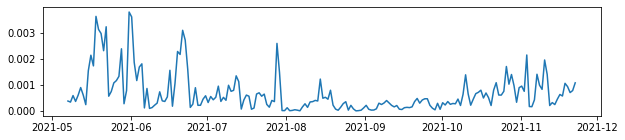

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
plt.plot(df2.ratio[df2.ticker == 'KRW-XRP'])

plt.show()

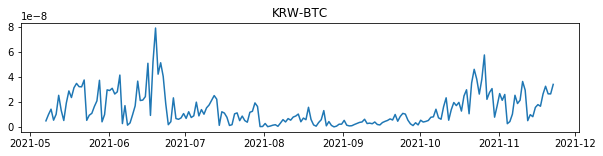

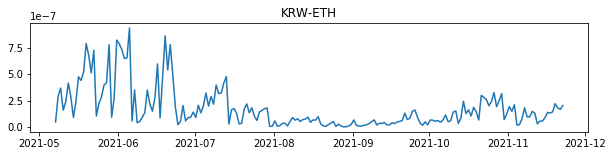

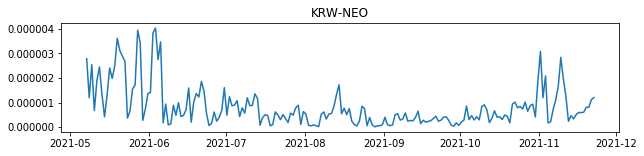

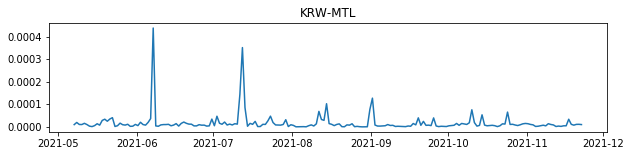

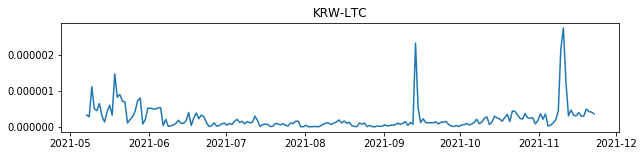

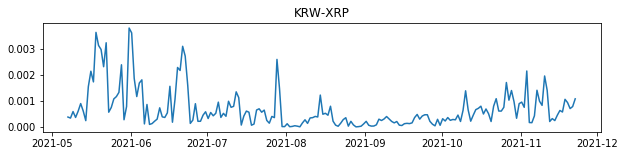

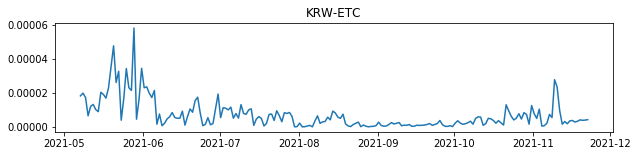

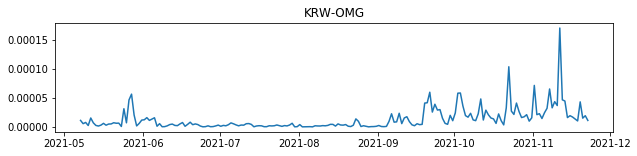

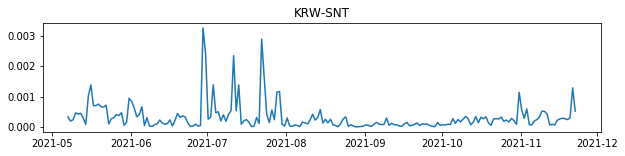

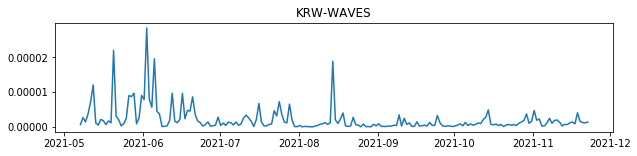

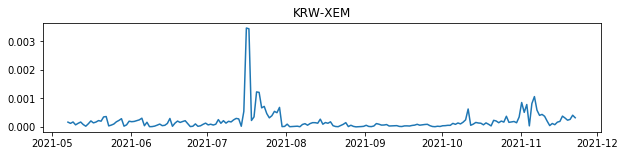

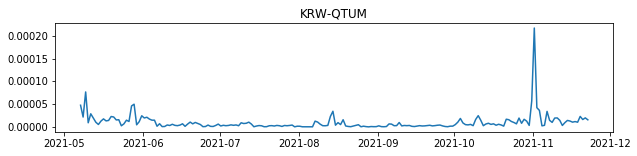

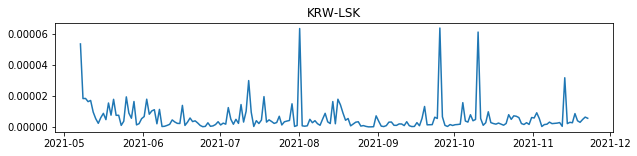

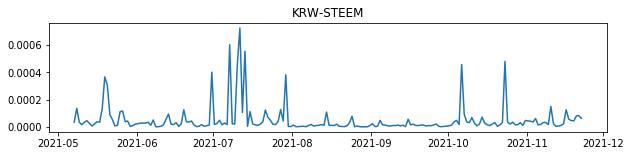

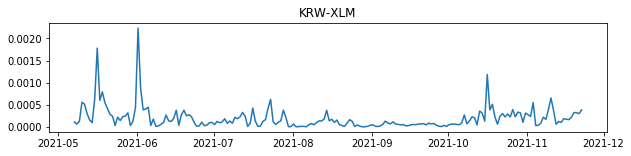

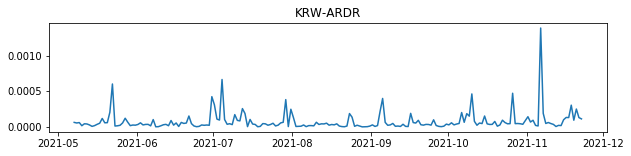

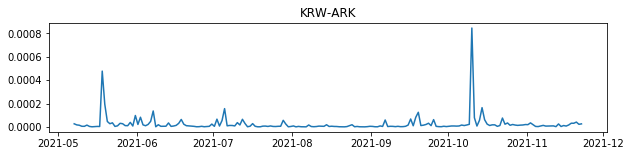

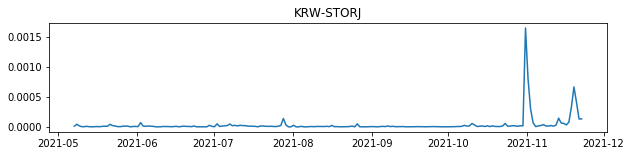

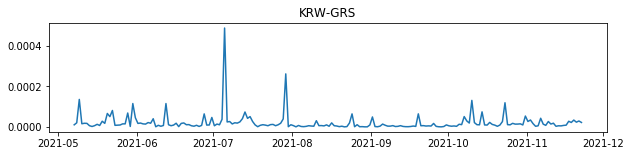

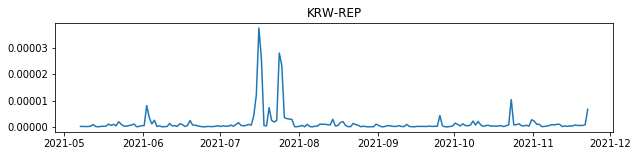

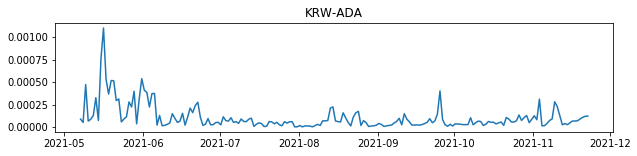

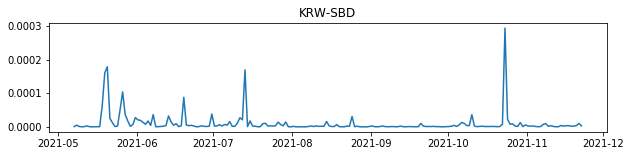

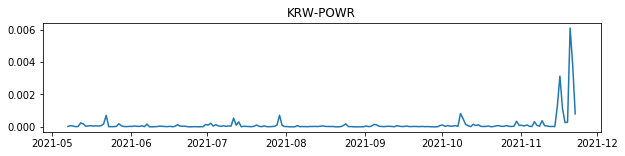

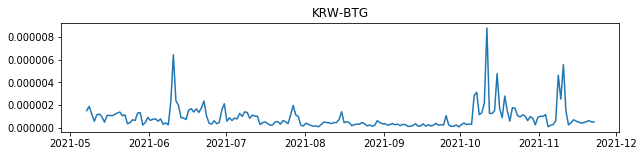

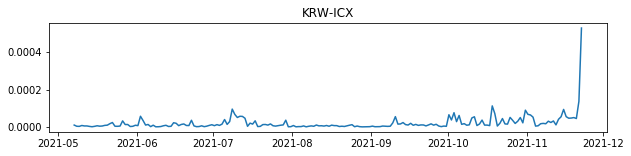

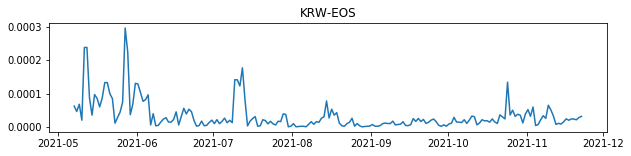

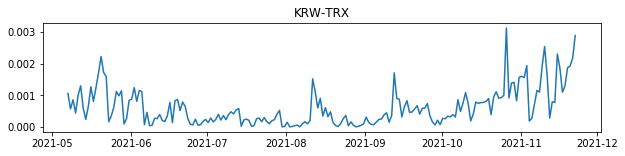

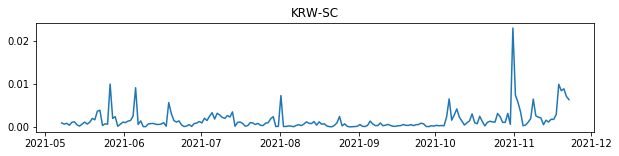

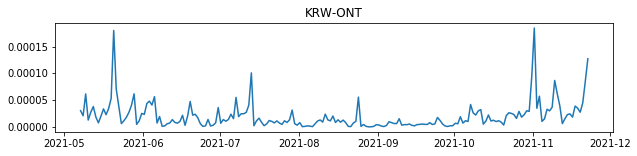

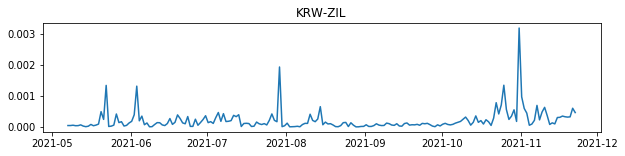

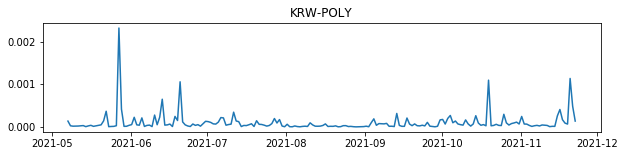

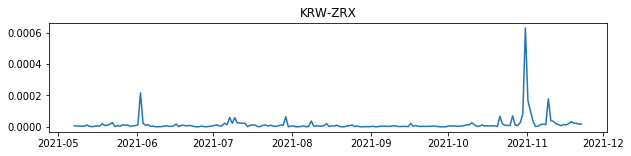

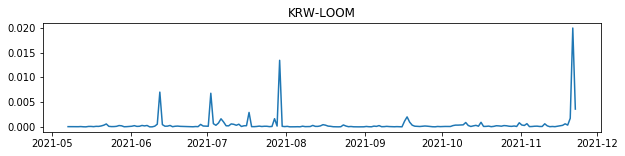

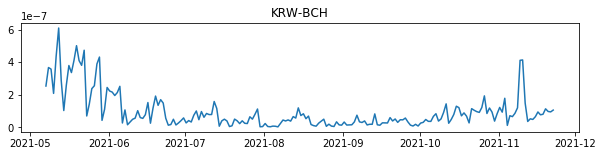

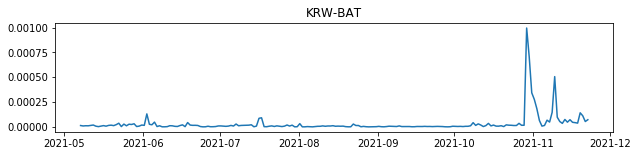

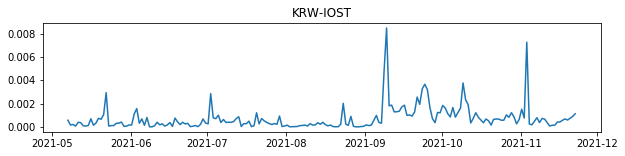

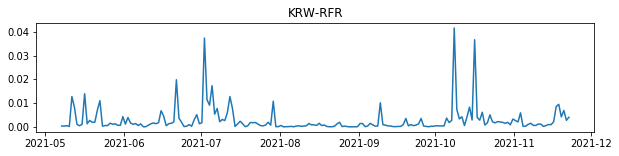

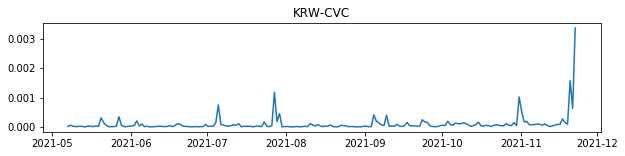

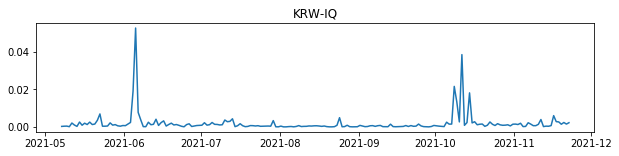

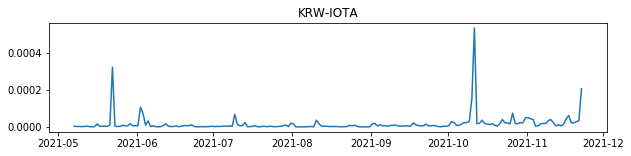

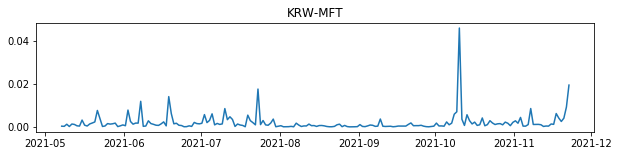

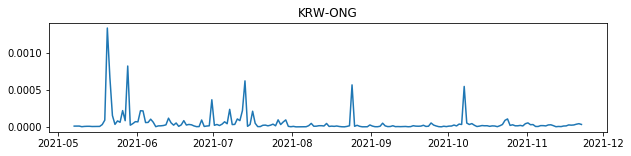

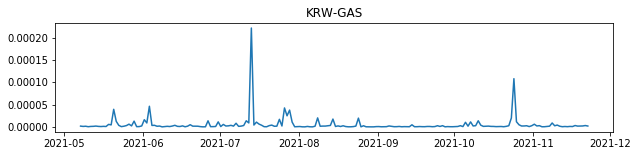

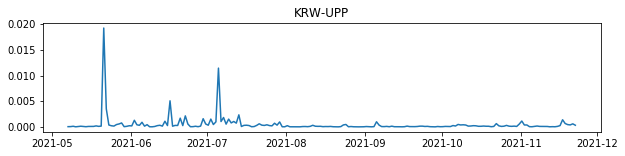

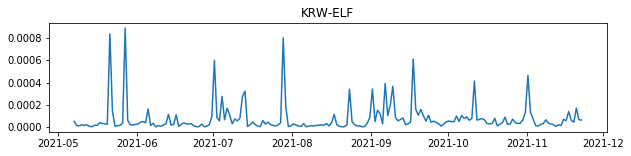

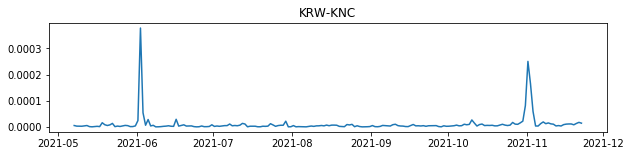

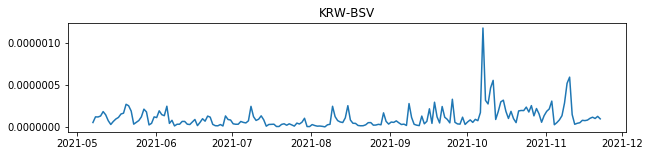

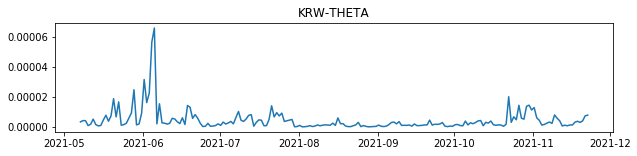

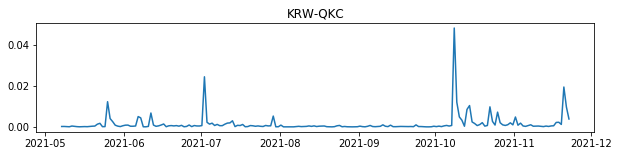

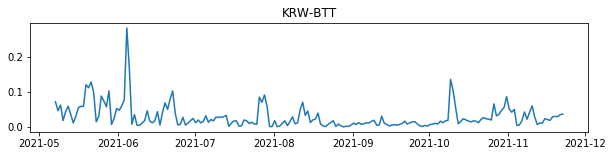

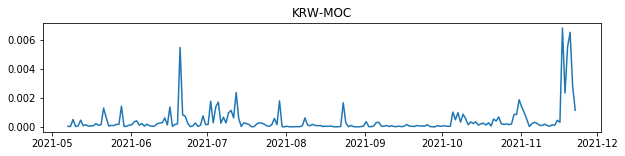

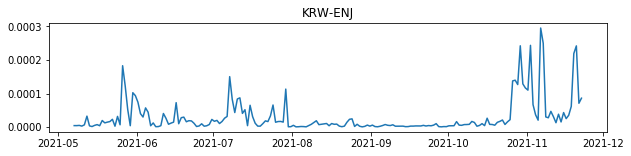

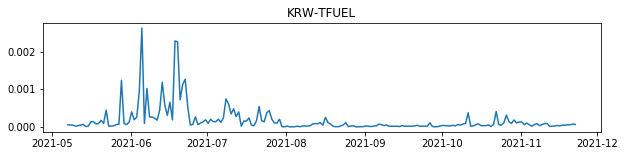

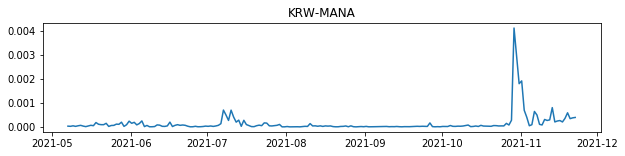

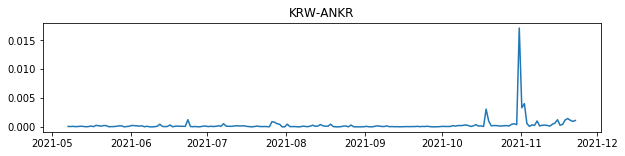

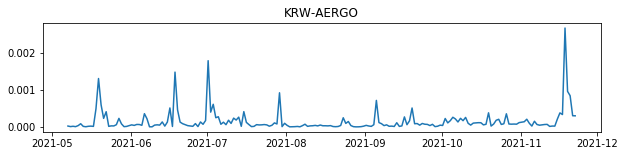

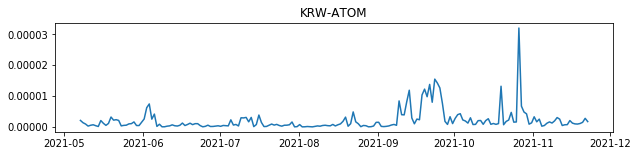

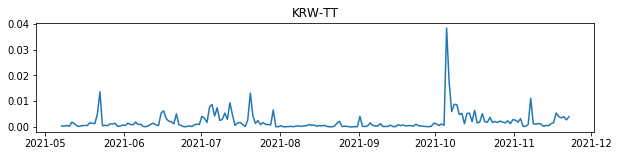

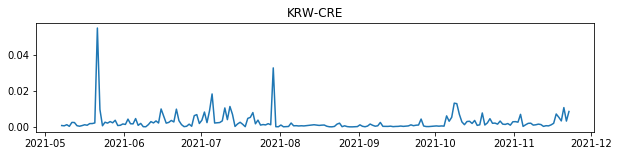

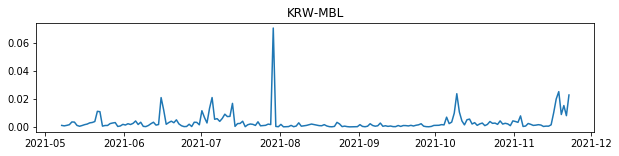

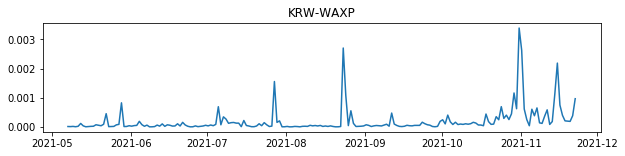

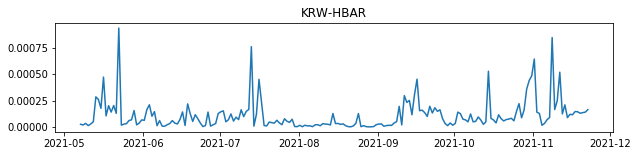

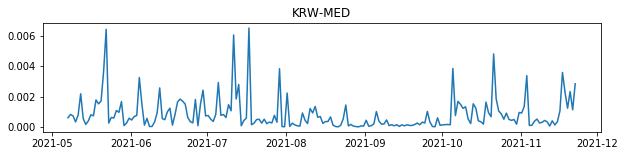

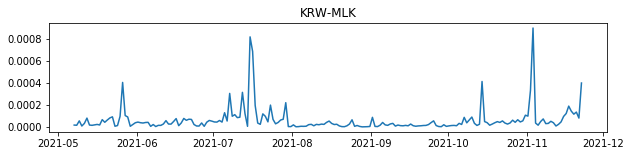

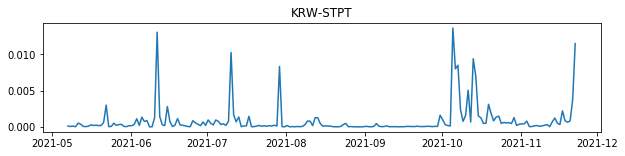

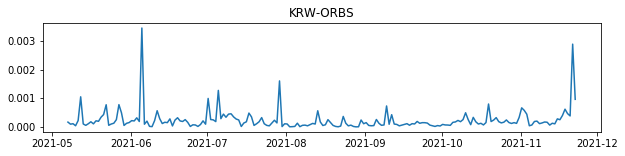

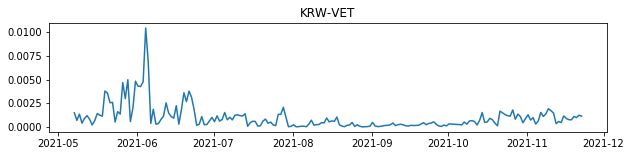

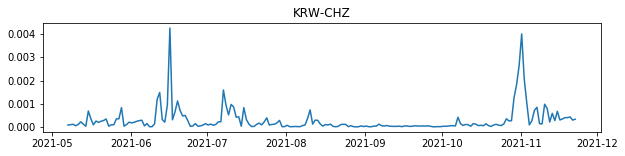

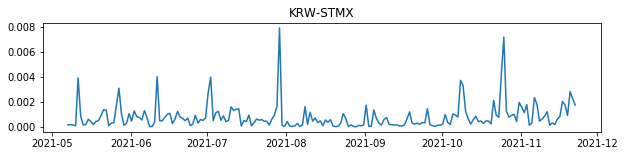

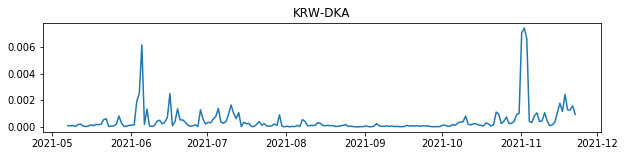

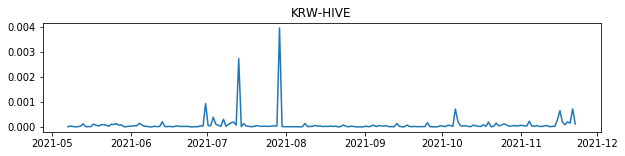

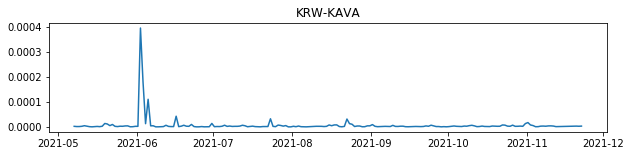

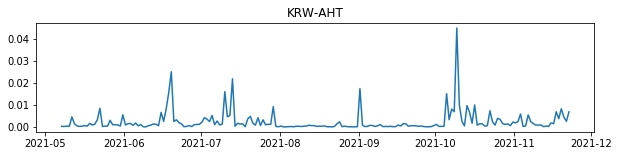

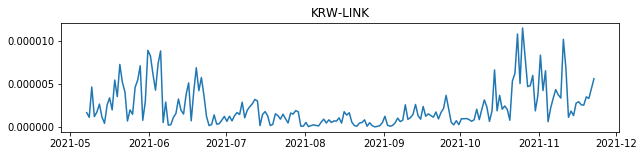

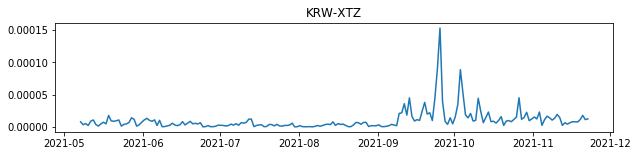

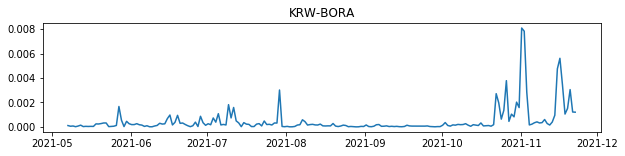

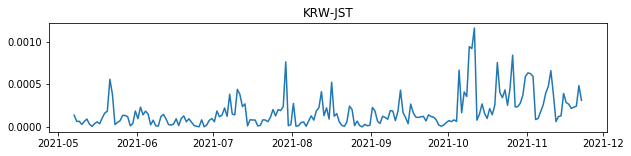

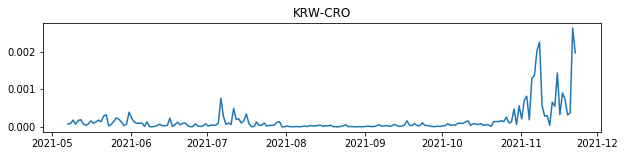

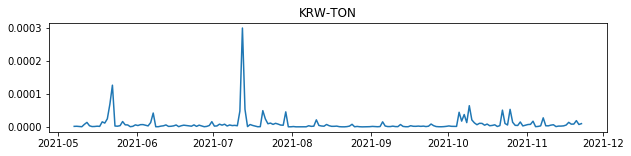

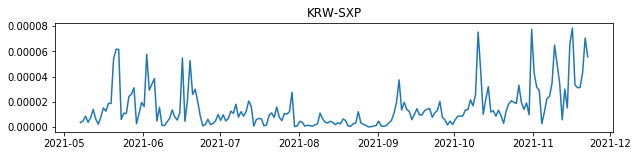

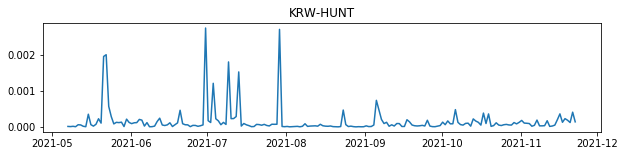

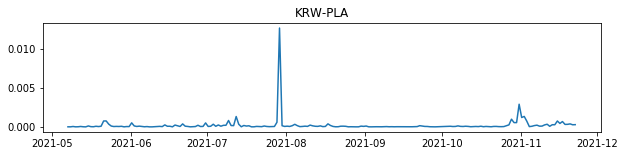

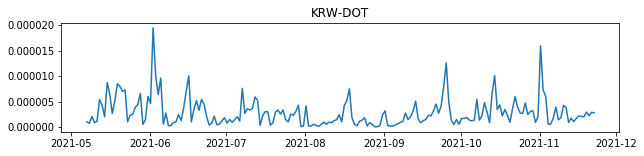

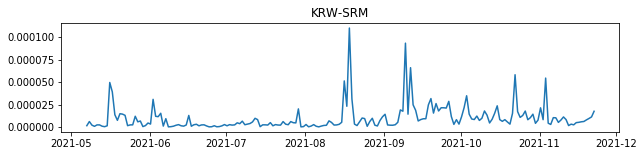

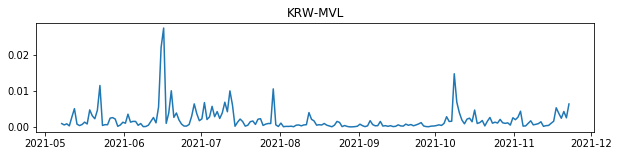

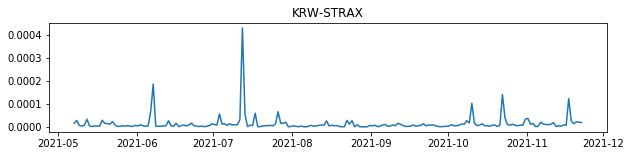

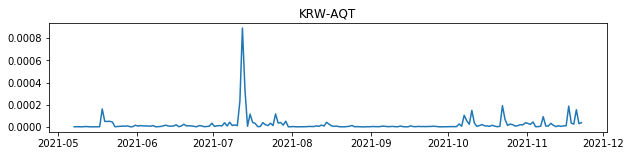

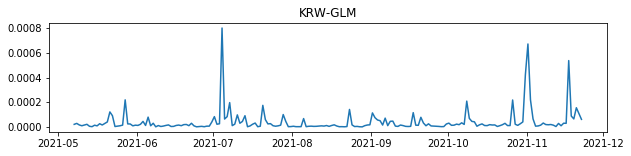

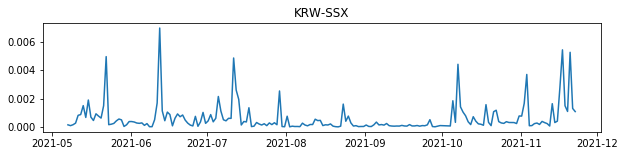

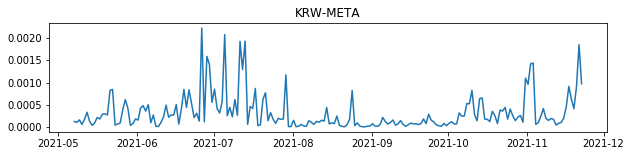

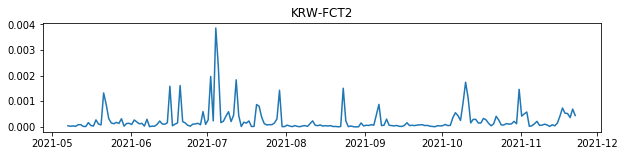

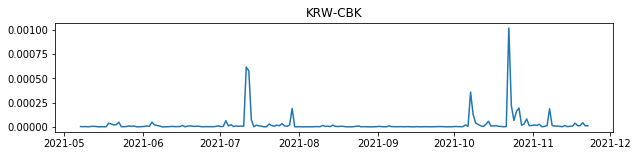

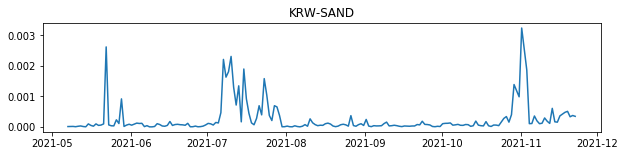

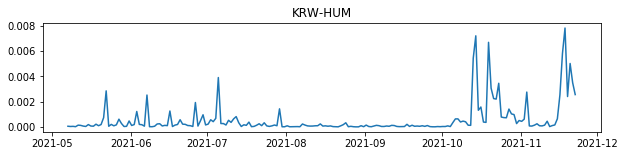

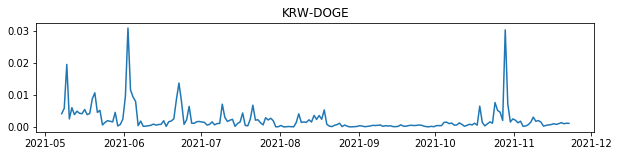

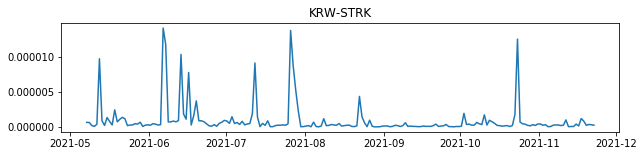

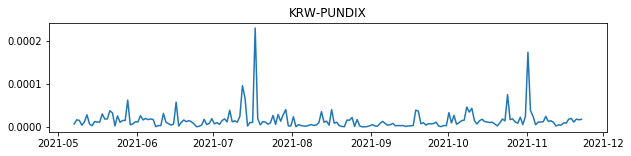

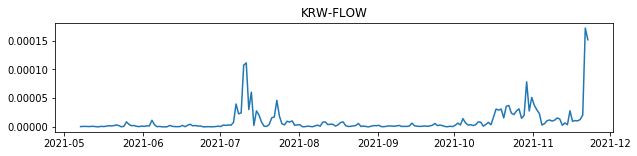

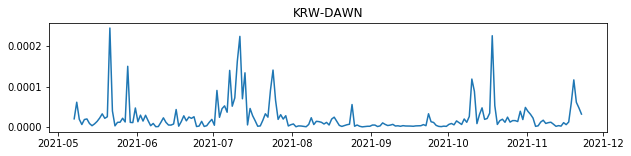

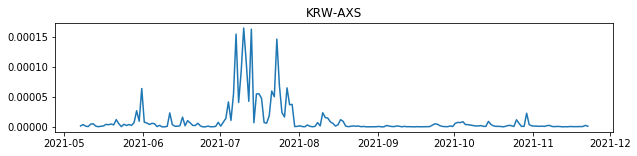

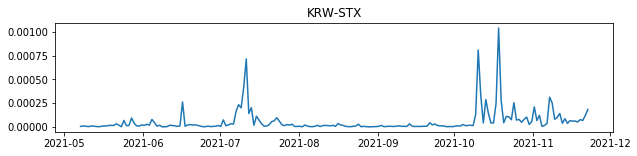

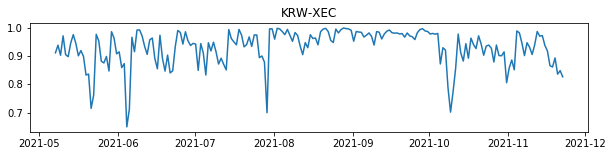

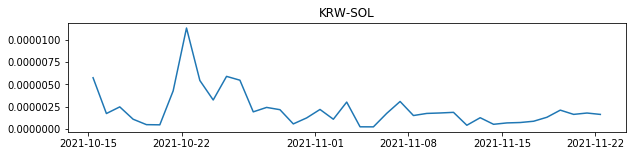

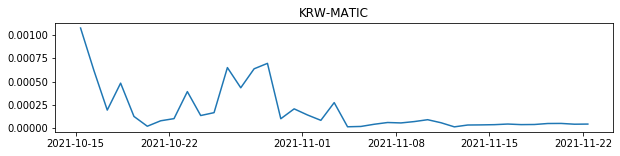

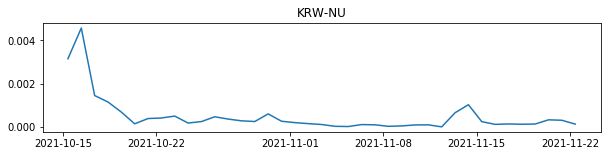

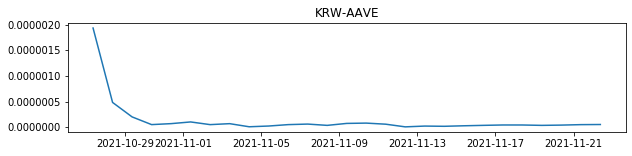

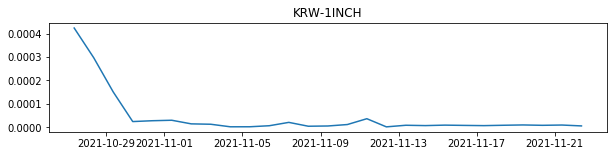

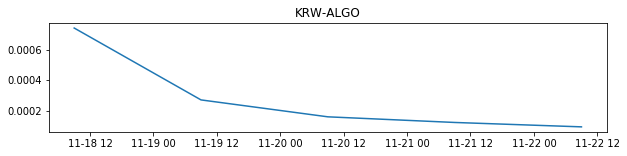

In [10]:
for i in range(len(tickers)):
    plt.figure(figsize=(10,2))
    plt.plot(df2.ratio[df2.ticker == tickers[i]])
    plt.title(tickers[i])
    plt.show()